In [24]:
import numpy as np
from qiskit import QuantumCircuit

In [39]:
circ = QuantumCircuit(3,3)
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

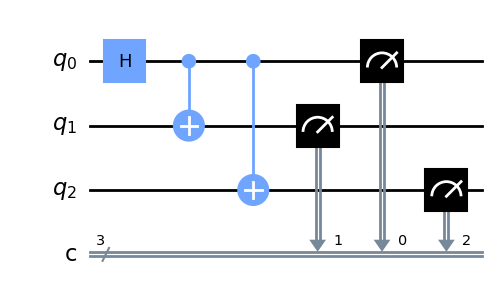

In [40]:
circ.draw()

In [41]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ)
state.draw()

Traceback (most recent call last):
  Cell In[41], line 3
    state = state.evolve(circ)
  File /opt/conda/lib/python3.10/site-packages/qiskit/quantum_info/states/statevector.py:392 in evolve
    return self._evolve_instruction(ret, other, qargs=qargs)
  File /opt/conda/lib/python3.10/site-packages/qiskit/quantum_info/states/statevector.py:952 in _evolve_instruction
    raise QiskitError(
QiskitError: 'Cannot apply instruction with classical bits: measure'

Use %tb to get the full traceback.


In [28]:
from qiskit.visualization import array_to_latex
array_to_latex(state)

<IPython.core.display.Latex object>

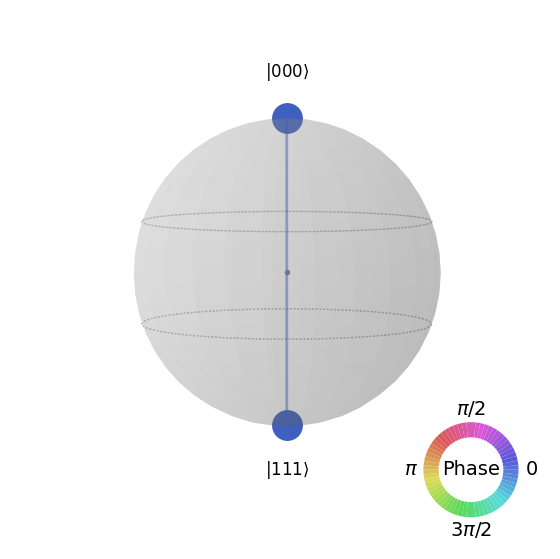

In [29]:
state.draw('qsphere')

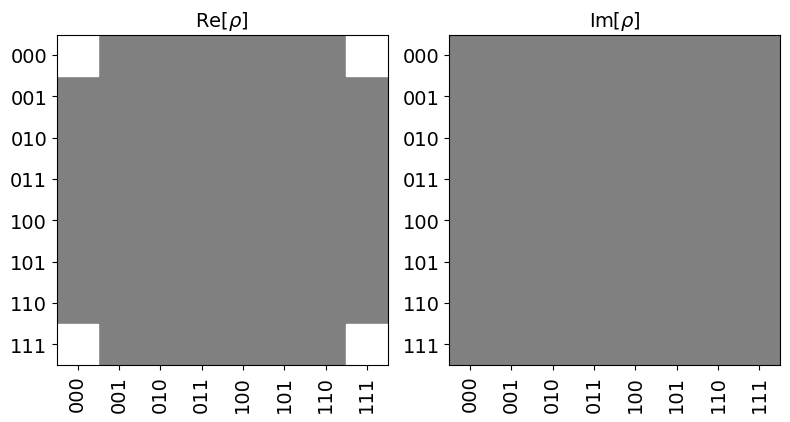

In [30]:
state.draw('hinton')

In [31]:
from qiskit.quantum_info import Operator
U = Operator(circ)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [32]:
from qiskit.quantum_info import DensityMatrix
dm = DensityMatrix(circ)
dm.draw()
array_to_latex(dm)

<IPython.core.display.Latex object>

In [33]:
from qiskit.quantum_info import Stinespring
dm = Stinespring(circ)
print(dm)

Stinespring([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
               0.        +0.j,  0.        +0.j,  0.        +0.j,
               0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
               0.        +0.j,  0.        +0.j,  0.        +0.j,
               0.70710678+0.j, -0.70710678+0.j],
             [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
               0.70710678+0.j,  0.        +0.j,  0.        +0.j,
               0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
               0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
               0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
               0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
               0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
              -0.70710678+0.j,  0.      

In [34]:
from qiskit.quantum_info import Quaternion
dm = Quaternion.from_axis_rotation(3.145,"x")
print(dm)

[-0.00170367  0.99999855  0.          0.        ]


In [36]:
from qiskit import transpile 
from qiskit.providers.aer import AerSimulator
circ.measure(range(3),range(3))
backend = AerSimulator()
qc_compiled = transpile(circ, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

In [37]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 530, '000': 494}


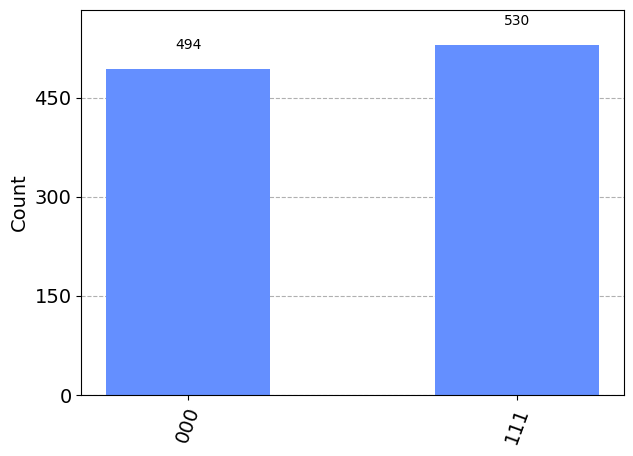

In [38]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)